## Homework - 4

### Submitted by: Apurv Mittal

In [25]:
import datetime
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten,  Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from matplotlib import pyplot as plt
import glob
from PIL import Image
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
original_images = glob.glob('/Users/apurv/Documents/SMU/7335 - Machine Learning II/Home Work 4/alphabets/*.jpg')

In [3]:
now = datetime.datetime.now
batch_size = 128
num_classes = 5
epochs = 5
img_rows, img_cols = 28, 28
filters = 32
pool_size = 2
kernel_size = 3
if K.image_data_format() == 'channels_first':
    input_shape = (1, img_rows, img_cols)
else:
    input_shape = (img_rows, img_cols, 1)

def train_model(model, train, test, num_classes):
    x_train = train[0].reshape((train[0].shape[0],) + input_shape)
    x_test = test[0].reshape((test[0].shape[0],) + input_shape)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    print('x_train shape:', x_train.shape)
    print(x_train.shape[0], 'train samples')
    print(x_test.shape[0], 'test samples')
    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(train[1], num_classes)
    y_test = keras.utils.to_categorical(test[1], num_classes)
    model.compile(loss='categorical_crossentropy',
                  optimizer='adadelta',
                  metrics=['accuracy'])
    t = now()
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test))
    print('Training time: %s' % (now() - t))
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train_lt5 = x_train[y_train < 5]
y_train_lt5 = y_train[y_train < 5]
x_test_lt5 = x_test[y_test < 5]
y_test_lt5 = y_test[y_test < 5]
x_train_gte5 = x_train[y_train >= 5]
y_train_gte5 = y_train[y_train >= 5] - 5
x_test_gte5 = x_test[y_test >= 5]
y_test_gte5 = y_test[y_test >= 5] - 5



feature_layers = [
    Conv2D(filters, kernel_size,
           padding='valid',
           input_shape=input_shape),
    Activation('relu'),
    Conv2D(filters, kernel_size),
    Activation('relu'),
    MaxPooling2D(pool_size=pool_size),
    Dropout(0.25),
    Flatten(),
]

classification_layers = [
    Dense(128),
    Activation('relu'),
    Dropout(0.5),
    Dense(num_classes),
    Activation('softmax')
]

# create complete model
model = Sequential(feature_layers + classification_layers)

# train model for 5-digit classification [0..4]
train_model(model,
            (x_train_lt5, y_train_lt5),
            (x_test_lt5, y_test_lt5), num_classes)

# freeze feature layers and rebuild model
for l in feature_layers:
    l.trainable = False

# transfer: train dense layers for new classification task [5..9]
train_model(model,
            (x_train_gte5, y_train_gte5),
            (x_test_gte5, y_test_gte5), num_classes)



2022-07-05 21:41:28.422841: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


x_train shape: (30596, 28, 28, 1)
30596 train samples
5139 test samples
Epoch 1/5
240/240 [==============================] - 27s 108ms/step - loss: 1.5884 - accuracy: 0.2508 - val_loss: 1.5634 - val_accuracy: 0.4275
Epoch 2/5
240/240 [==============================] - 25s 106ms/step - loss: 1.5478 - accuracy: 0.3442 - val_loss: 1.5143 - val_accuracy: 0.5661
Epoch 3/5
240/240 [==============================] - 32s 132ms/step - loss: 1.5012 - accuracy: 0.4301 - val_loss: 1.4577 - val_accuracy: 0.7001
Epoch 4/5
240/240 [==============================] - 29s 120ms/step - loss: 1.4458 - accuracy: 0.5190 - val_loss: 1.3908 - val_accuracy: 0.8202
Epoch 5/5
240/240 [==============================] - 29s 122ms/step - loss: 1.3831 - accuracy: 0.5888 - val_loss: 1.3140 - val_accuracy: 0.8634
Training time: 0:02:21.747396
Test score: 1.3139983415603638
Test accuracy: 0.8633975386619568
x_train shape: (29404, 28, 28, 1)
29404 train samples
4861 test samples
Epoch 1/5
230/230 [======================

References:

https://github.com/awslabs/keras-apache-mxnet/blob/master/examples/mnist_transfer_cnn.py

https://github.com/UCMercedACM/Handwriting-ML/wiki/Keras-Transfer-Learning-Example-on-MNIST-%28Handwriting-Dataset%29

In [4]:
# import letters from emnist

#Reference: https://www.linkedin.com/pulse/day-44-code-example-import-emnist-dataset-print-gopi-chandrakesan/

# Load emnist dataset

from emnist import extract_samples
# load Alphabets data, split between train and test sets
(x_letter_train, y_letter_train) = extract_samples('letters', 'train')
#(x_letter_test, y_letter_test) = extract_samples('letters', 'test')

# adjust the output labels for alphabets 'A', 'B', 'C', 'D', 'E'
x_letter_train = x_letter_train[y_letter_train < 6]
y_letter_train = y_letter_train[y_letter_train < 6]-1
#x_letter_test_lt6 = x_letter_test[y_letter_test < 6]
#y_letter_test_lt6 = y_letter_test[y_letter_test < 6]-1
        

Train: X=(24000, 28, 28, 1), y=(24000,)
Target value: 4
Target value: 1
Target value: 4
Target value: 0
Target value: 0
Target value: 0
Target value: 3
Target value: 0
Target value: 2
Target value: 1
Target value: 2
Target value: 3
Target value: 0
Target value: 4
Target value: 1
Target value: 1


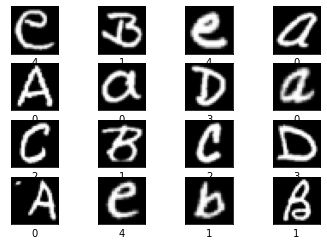

In [28]:

# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_letter_train.shape, y_letter_train.shape))
#print('Test: X=%s, y=%s' % (x_letter_test_lt6.shape, y_letter_test_lt6.shape))
# plot first few images
for i in range(16):
    print("Target value:",y_letter_train[i])
    # define subplot
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    # plot raw pixel data
    plt.imshow(x_letter_train[i], cmap=plt.get_cmap('gray'))
    plt.xlabel(y_letter_train[i])
# show the figure
plt.show()

In [6]:
size = (28,28) # matching the size of the emnist dataset
hand_written = []
for i in range(len(original_images)):
    im = Image.open(original_images[i]).convert("L").resize(size)  #convert to greyscale
    hand_written.append(np.array(im))

In [7]:
# converting to an array and normalizing by dividing by 255

hand_written_array = np.asarray(hand_written)/255

i= 0


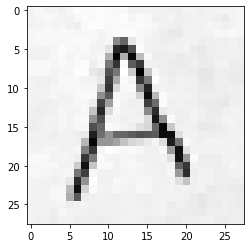

i= 1


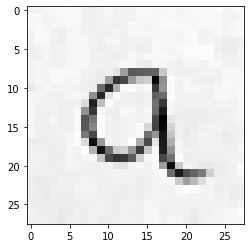

i= 2


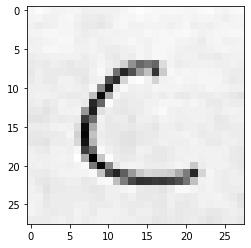

i= 3


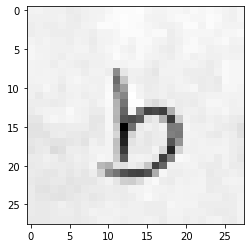

i= 4


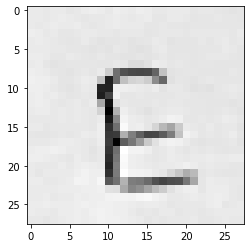

i= 5


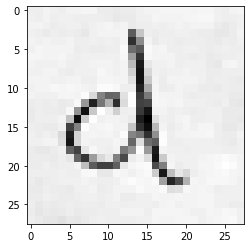

i= 6


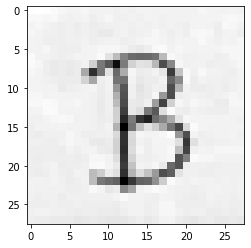

i= 7


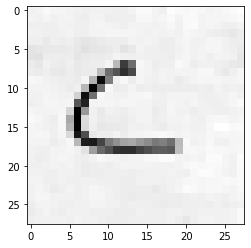

i= 8


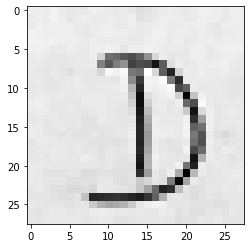

i= 9


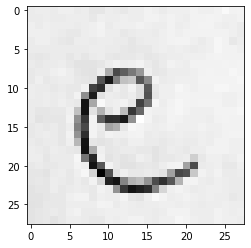

In [8]:
# check images loaded correctly and validate the index values to assign target
for i in range(10):
    print("i=",i)
    plt.imshow(hand_written_array[i], cmap=plt.get_cmap('gray'))
    plt.show()


In [9]:
#target=[1,1,3,2,5,4,2,3,4,5]
target=[0,0,2,1,4,3,1,2,3,4]
y_test = np.asarray(target)
X_test = hand_written_array

Train: X=(24000, 28, 28, 1), y=(24000,)
Test: X=(10, 28, 28, 1), y=(10,)
Test Data Target value: 0
Test Data Target value: 0
Test Data Target value: 2
Test Data Target value: 1
Test Data Target value: 4
Test Data Target value: 3
Test Data Target value: 1
Test Data Target value: 2
Test Data Target value: 3
Test Data Target value: 4


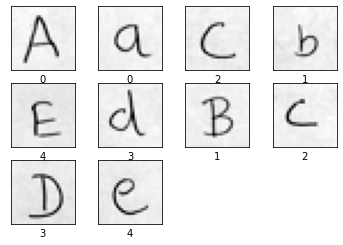

In [30]:

# Print the data and validate 
print('Train: X=%s, y=%s' % (x_letter_train.shape, y_letter_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))
# plot first few images
for i in range(10):
    print("Test Data Target value:",y_test[i])
    # define subplot
    plt.subplot(3,4,i+1)
    plt.xticks([])
    plt.yticks([])
    # plot raw pixel data
    plt.imshow(hand_written_array[i], cmap=plt.get_cmap('gray'))
    plt.xlabel(y_test[i])
# show the figure
plt.show()




In [11]:
# add the color channel
x_letter_train = x_letter_train.reshape(x_letter_train.shape + (1,))
X_test = X_test.reshape(X_test.shape + (1,))
print(x_letter_train.shape)
print(X_test.shape)

(24000, 28, 28, 1)
(10, 28, 28, 1)


#### Ran with the defined function earlier.

In [12]:
# train model for 5-digit classification [0..4]
train_model(model,
            (x_letter_train, y_letter_train),
            (X_test, y_test), num_classes)


x_train shape: (24000, 28, 28, 1)
24000 train samples
10 test samples
Epoch 1/5
188/188 [==============================] - 7s 33ms/step - loss: 1.6386 - accuracy: 0.1999 - val_loss: 1.6095 - val_accuracy: 0.2000
Epoch 2/5
188/188 [==============================] - 6s 32ms/step - loss: 1.5982 - accuracy: 0.2290 - val_loss: 1.6095 - val_accuracy: 0.2000
Epoch 3/5
188/188 [==============================] - 6s 33ms/step - loss: 1.5644 - accuracy: 0.2629 - val_loss: 1.6095 - val_accuracy: 0.2000
Epoch 4/5
188/188 [==============================] - 7s 35ms/step - loss: 1.5276 - accuracy: 0.3103 - val_loss: 1.6095 - val_accuracy: 0.2000
Epoch 5/5
188/188 [==============================] - 6s 33ms/step - loss: 1.4981 - accuracy: 0.3554 - val_loss: 1.6095 - val_accuracy: 0.2000
Training time: 0:00:32.152649
Test score: 1.6094820499420166
Test accuracy: 0.20000000298023224


#### Results are not good. Use the dense layers sequential model for classification.

In [13]:

now = datetime.datetime.now
batch_size = 128
num_classes = 5
epochs = 5
img_rows, img_cols = 28, 28
filters = 32
pool_size = 2
kernel_size = 3

feature_layers = [
    Conv2D(filters, kernel_size,
           padding='valid',
           input_shape=input_shape),
    Activation('relu'),
    Conv2D(filters, kernel_size),
    Activation('relu'),
    MaxPooling2D(pool_size=pool_size),
    Dropout(0.25),
    Flatten(),
]

classification_layers = [
    Dense(128),
    Activation('relu'),
    Dropout(0.5),
    Dense(num_classes),
    Activation('softmax')
]

# create complete model
model = Sequential(feature_layers + classification_layers)

# Early Stopping

es = keras.callbacks.EarlyStopping(min_delta=0.001, patience=2)

# Compile Model

model.compile(loss='sparse_categorical_crossentropy',
                      optimizer='adam', 
                      metrics=['accuracy'])



In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 activation_4 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 activation_5 (Activation)   (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 32)        0         
                                                      

In [20]:

alphabets_model = model.fit(x_letter_train, y_letter_train,
                              validation_data=(X_test, y_test),
                              batch_size=240,
                              epochs=100, callbacks=[es])

Epoch 1/100
100/100 [==============================] - 21s 207ms/step - loss: 0.1713 - accuracy: 0.9442 - val_loss: 1.6093 - val_accuracy: 0.2000
Epoch 2/100
100/100 [==============================] - 19s 191ms/step - loss: 0.1494 - accuracy: 0.9509 - val_loss: 1.6096 - val_accuracy: 0.2000
Epoch 3/100
100/100 [==============================] - 20s 200ms/step - loss: 0.1254 - accuracy: 0.9580 - val_loss: 1.6083 - val_accuracy: 0.2000
Epoch 4/100
100/100 [==============================] - 22s 218ms/step - loss: 0.1086 - accuracy: 0.9633 - val_loss: 1.6094 - val_accuracy: 0.2000
Epoch 5/100
100/100 [==============================] - 21s 211ms/step - loss: 0.1020 - accuracy: 0.9666 - val_loss: 1.6089 - val_accuracy: 0.2000


#### Accuracy of 96.6%